## iris dataset classification using KMeans

### importing libraries

In [1]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
iris = load_iris()

In [2]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [3]:
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [4]:
df = pd.DataFrame(iris.data,columns=iris.feature_names)
df['class'] = iris.target

In [5]:
df = df.drop(['sepal length (cm)','sepal width (cm)'],axis=1)
df

,petal length (cm),petal width (cm),class
0,1.4,0.2,0
1,1.4,0.2,0
2,1.3,0.2,0
3,1.5,0.2,0
4,1.4,0.2,0
...,...,...,...
145,5.2,2.3,2
146,5.0,1.9,2
147,5.2,2.0,2
148,5.4,2.3,2


### Data visualization

Text(0, 0.5, 'petal_width')

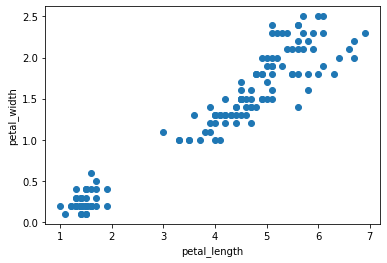

In [7]:
%matplotlib inline
plt.scatter(df['petal length (cm)'],df['petal width (cm)'])
plt.xlabel('petal_length')
plt.ylabel('petal_width')

### before preprocessing

In [8]:
km = KMeans(n_clusters=3)
km.fit(df[['petal length (cm)','petal width (cm)']])
ans = km.predict(df[['petal length (cm)','petal width (cm)']])
ans

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [9]:
df['cluster'] = ans
df

,petal length (cm),petal width (cm),class,cluster
0,1.4,0.2,0,0
1,1.4,0.2,0,0
2,1.3,0.2,0,0
3,1.5,0.2,0,0
4,1.4,0.2,0,0
...,...,...,...,...
145,5.2,2.3,2,1
146,5.0,1.9,2,1
147,5.2,2.0,2,1
148,5.4,2.3,2,1


In [10]:
km.cluster_centers_

array([[1.462     , 0.246     ],
       [5.59583333, 2.0375    ],
       [4.26923077, 1.34230769]])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


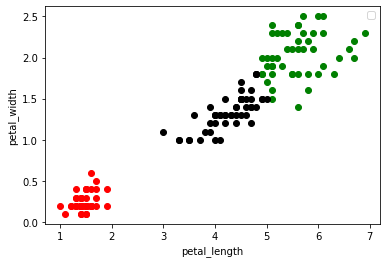

In [11]:
df0 = df[df.cluster==0]
df1 = df[df.cluster==1]
df2 = df[df.cluster==2]

plt.scatter(df0['petal length (cm)'],df0['petal width (cm)'],color='red')
plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'],color='green')
plt.scatter(df2['petal length (cm)'],df2['petal width (cm)'],color='black')
plt.xlabel('petal_length')
plt.ylabel('petal_width')
plt.legend()

### after scale down the values

In [12]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()

In [13]:
df['petal length (cm)'] = mms.fit_transform(df[['petal length (cm)']])

In [14]:
df['petal width (cm)'] = mms.fit_transform(df[['petal width (cm)']])

In [15]:
df

,petal length (cm),petal width (cm),class,cluster
0,0.067797,0.041667,0,0
1,0.067797,0.041667,0,0
2,0.050847,0.041667,0,0
3,0.084746,0.041667,0,0
4,0.067797,0.041667,0,0
...,...,...,...,...
145,0.711864,0.916667,2,1
146,0.677966,0.750000,2,1
147,0.711864,0.791667,2,1
148,0.745763,0.916667,2,1


Text(0, 0.5, 'petal_width')

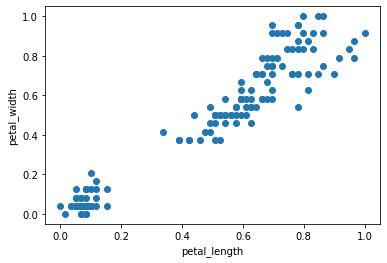

In [16]:
%matplotlib inline
plt.scatter(df['petal length (cm)'],df['petal width (cm)'])
plt.xlabel('petal_length')
plt.ylabel('petal_width')

In [17]:
km = KMeans(n_clusters=3)
km.fit(df[['petal length (cm)','petal width (cm)']])
ans = km.predict(df[['petal length (cm)','petal width (cm)']])
ans

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [18]:
df['new_cluster'] = ans
df

,petal length (cm),petal width (cm),class,cluster,new_cluster
0,0.067797,0.041667,0,0,0
1,0.067797,0.041667,0,0,0
2,0.050847,0.041667,0,0,0
3,0.084746,0.041667,0,0,0
4,0.067797,0.041667,0,0,0
...,...,...,...,...,...
145,0.711864,0.916667,2,1,1
146,0.677966,0.750000,2,1,1
147,0.711864,0.791667,2,1,1
148,0.745763,0.916667,2,1,1


In [19]:
km.cluster_centers_

array([[0.07830508, 0.06083333],
       [0.7740113 , 0.81510417],
       [0.55867014, 0.51041667]])

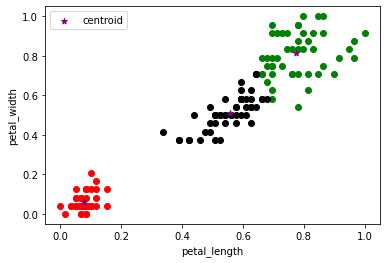

In [20]:
df0 = df[df.cluster==0]
df1 = df[df.cluster==1]
df2 = df[df.cluster==2]

plt.scatter(df0['petal length (cm)'],df0['petal width (cm)'],color='red')
plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'],color='green')
plt.scatter(df2['petal length (cm)'],df2['petal width (cm)'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('petal_length')
plt.ylabel('petal_width')
plt.legend()

### find real k value using elbow method

In [21]:
k_range = range(1,10)
sse = []
for i in k_range:
    km = KMeans(n_clusters=i)
    km.fit(df[['petal length (cm)','petal width (cm)']])
    sse.append(km.inertia_)

C:\Users\91910\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [22]:
sse

[28.368353219727194,
 5.176463590044369,
 1.7018746881920963,
 1.1588792731667128,
 0.853861735391224,
 0.6795297632254397,
 0.5663174952054538,
 0.48634024603929904,
 0.41602409225888737]

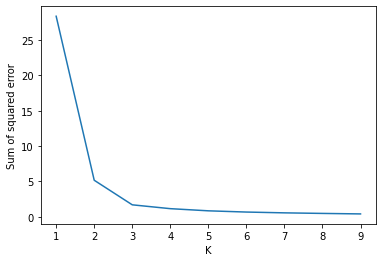

In [23]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_range,sse)